In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kích thước dữ liệu đầu vào: (60000, 784)
Đang chạy K-Means (k=10)... Quá trình này có thể mất khoảng 1-2 phút...
Đã gom cụm xong!

Độ chính xác (Accuracy) của K-Means: 0.5910 (59.10%)


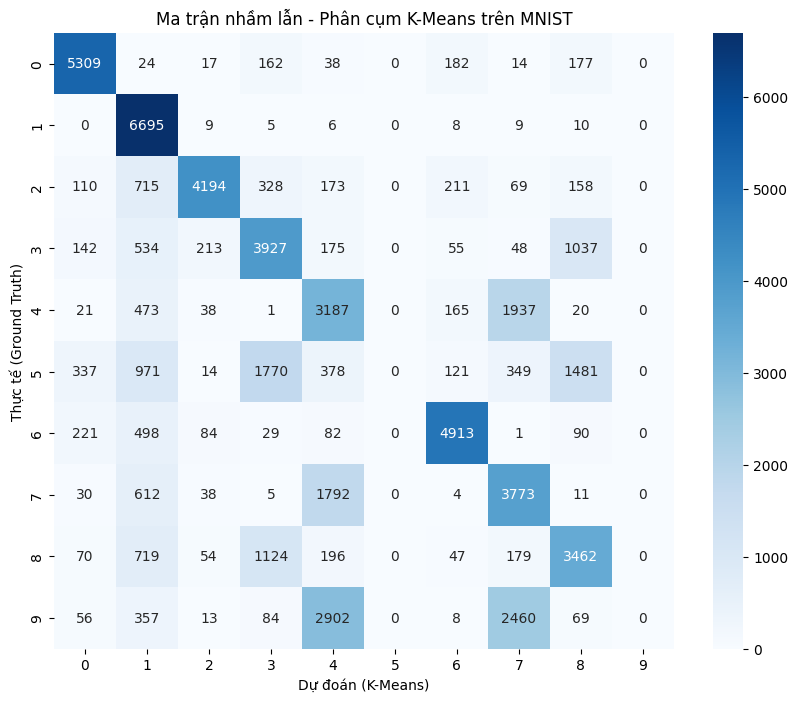

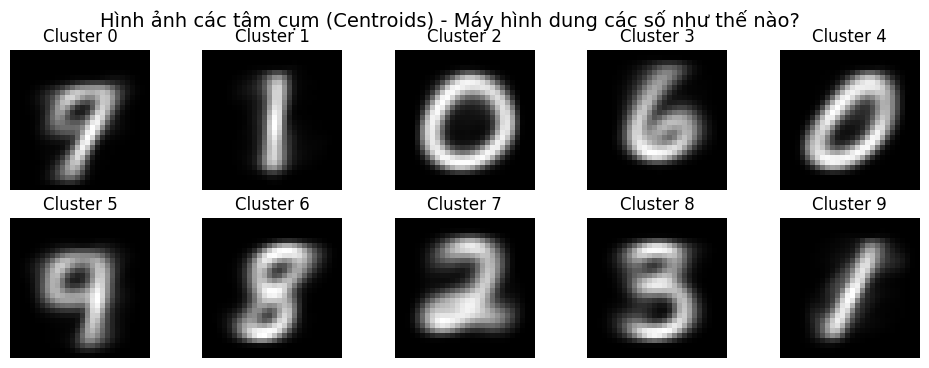

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# K-Means cần đầu vào là vector 1 chiều (không phải ảnh 2D)
# Reshape từ (60000, 28, 28) -> (60000, 784)
# Chuẩn hóa về [0, 1]
X = x_train.reshape(len(x_train), -1).astype('float32') / 255.0
y = y_train

print(f"Kích thước dữ liệu đầu vào: {X.shape}")

# CHẠY K-MEANS
print("Đang chạy K-Means (k=10)... Quá trình này có thể mất khoảng 1-2 phút...")
# n_clusters=10: Tương ứng 10 chữ số
# n_init=10: Chạy 10 lần với tâm ngẫu nhiên để tìm kết quả tốt nhất
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

print("Đã gom cụm xong!")

# GÁN NHÃN LẠI (LABEL MAPPING)
# Hàm này sẽ xem trong mỗi cụm K-Means, số nào xuất hiện nhiều nhất
# thì gán nhãn cụm đó là số đó.
def map_clusters_to_labels(kmeans_clusters, true_labels):
    labels = np.zeros_like(kmeans_clusters)
    for i in range(10):
        # Lấy các chỉ số (index) của các điểm thuộc cụm i
        mask = (kmeans_clusters == i)
        # Tìm nhãn thực tế phổ biến nhất trong cụm đó (mode)
        # Ví dụ: Trong cụm 0 có 90% là số 7 -> Gán cụm 0 = số 7
        if np.sum(mask) > 0:
            most_common = mode(true_labels[mask])[0] # Lấy giá trị mode
            # Lưu ý: scipy.stats.mode trả về mảng, cần lấy phần tử đầu tiên
            # Tùy phiên bản scipy, kết quả có thể là scalar hoặc array
            if np.ndim(most_common) > 0:
                 labels[mask] = most_common[0]
            else:
                 labels[mask] = most_common
    return labels

# Thực hiện gán nhãn dự đoán chuẩn
y_pred = map_clusters_to_labels(clusters, y)

# ---------------------------------------------------------
# 4. ĐÁNH GIÁ KẾT QUẢ
# ---------------------------------------------------------
# Tính Accuracy
acc = accuracy_score(y, y_pred)
print(f"\nĐộ chính xác (Accuracy) của K-Means: {acc:.4f} ({acc*100:.2f}%)")

# Vẽ Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Dự đoán (K-Means)')
plt.ylabel('Thực tế (Ground Truth)')
plt.title('Ma trận nhầm lẫn - Phân cụm K-Means trên MNIST')
plt.show()

# (BONUS) HIỂN THỊ TÂM CỤM (CENTROIDS)
# Tâm cụm chính là "hình ảnh trung bình" của con số mà K-Means hình dung ra
centers = kmeans.cluster_centers_.reshape(10, 28, 28)

plt.figure(figsize=(12, 4))
plt.suptitle("Hình ảnh các tâm cụm (Centroids) - Máy hình dung các số như thế nào?", fontsize=14)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Cluster {i}")
plt.show()